In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from html.parser import HTMLParser #https://docs.python.org/3/library/html.parser.html
from bs4 import BeautifulSoup
import time

In [2]:
time.time()

1716071144.4197032

In [3]:
df = pd.read_pickle('webdata_27.pkl') # put in the path for your labels - file here
df_eye = pd.read_csv("test.csv") # Enter your eye tracking csv here
df_time = pd.read_csv("test_time.csv")  # Enter you eye tracking time csv here

# TODO: convert all timestamps to UNIX
# Bring first timestamp to 0

In [4]:
df['CurrentTimstamp'] = df['CurrentTimstamp'] // 1000

In [5]:
df['CurrentTimstamp'] = pd.to_datetime(df['CurrentTimstamp'], unit='s')
df.head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml
0,2024-05-02 07:18:51,load,,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:18:52,"<body> <a href=""/ref=cs_503_logo""><img alt=""Am..."
1,2024-05-02 07:18:56,load,,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:18:58,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
2,2024-05-02 07:19:00,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:02,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
3,2024-05-02 07:19:02,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:04,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
4,2024-05-02 07:19:05,scroll,scrollup,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:07,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."


In [6]:
TimeStartUnix = df['CurrentTimstamp'].min()
print(TimeStartUnix)

2024-05-02 07:18:51


In [7]:
def convert_unix_to_seconds(row):
    calculated_time = row - TimeStartUnix
    return calculated_time.total_seconds()


In [8]:
df['CurrentTimstamp'] = df['CurrentTimstamp'].apply(convert_unix_to_seconds)

In [9]:
df.head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml
0,0.0,load,,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:18:52,"<body> <a href=""/ref=cs_503_logo""><img alt=""Am..."
1,5.0,load,,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:18:58,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
2,9.0,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:02,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
3,11.0,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:04,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
4,14.0,scroll,scrollup,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:07,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."


In [62]:
df.CurrentTimstamp

0         0.0
1         5.0
2         9.0
3        11.0
4        14.0
        ...  
636    2909.0
637    2910.0
638    2914.0
639    2919.0
640    2934.0
Name: CurrentTimstamp, Length: 641, dtype: float64

In [10]:
df_eye.head()

,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr
0,384009,1022.6,278.9,1929.0,987.0,312.5,1600.0,32768.0
1,384011,1023.1,280.0,1927.0,988.2,313.2,1593.0,32768.0
2,384013,1023.5,281.1,1928.0,987.8,311.6,1602.0,32768.0
3,384015,1024.1,282.1,1935.0,987.1,310.0,1612.0,32768.0
4,384017,1024.6,282.2,1938.0,988.7,310.6,1611.0,32768.0


In [11]:
del df_time['Unnamed: 0']

In [12]:
df_time['UnixTimeStamp'] = df_time.UnixTimeStamp.astype(int)
df_time.head()

,Message,ETT,MSG2,UnixTimeStamp
0,MSG,417417,UNIX:,1714634330
1,MSG,555175,UNIX:,1714634468
2,MSG,689663,UNIX:,1714634602
3,MSG,817494,UNIX:,1714634730
4,MSG,949384,UNIX:,1714634862


In [13]:
df_time.UnixTimeStamp[0]

1714634330

In [14]:
df.CurrentEvent.unique()

array(['load', 'scroll', 'click'], dtype=object)

In [15]:
df.head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml
0,0.0,load,,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:18:52,"<body> <a href=""/ref=cs_503_logo""><img alt=""Am..."
1,5.0,load,,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:18:58,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
2,9.0,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:02,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
3,11.0,scroll,scrolldown,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:04,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
4,14.0,scroll,scrollup,0.0,0.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:19:07,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."


In [16]:
len(df)

641

- CurrentTimstamp: Unix timestamp in milliseconds
- CurrentEvent: Event happened (click, scroll, page loaded)
- CurrentTarget: For clicks: UUID of clicked target, for scrolls: down / up
- CurrentClickX: only clicks: x-coord
- CurrentClickY: only clicks: y-coord
- CurrentURL: current URL of webpage
- outerWidth: Window.outerWidth
- outerHeight: Window.outerHeight
- innerWidth: Window.innerWidth
- innerHeight: Window.innerHeight
- created: Another timestamp - can be ignored
- CurrentHtml: The HTML of the current webpage. each element has been injected with thei x,y corrds, width and height. and "customuuid"

<img src="coords.png">

In [17]:
df.CurrentEvent.unique()

array(['load', 'scroll', 'click'], dtype=object)

In [18]:
str(df.CurrentHtml.iloc[1])[:1000]

'<body class="a-m-us a-aui_72554-c a-aui_a11y_2_750578-c a-aui_a11y_6_837773-c a-aui_a11y_sr_678508-t1 a-aui_amzn_img_861115-c a-aui_amzn_img_gate_861116-c a-aui_killswitch_csa_logger_372963-c a-aui_pci_risk_banner_210084-c a-aui_preload_261698-c a-aui_rel_noreferrer_noopener_309527-c a-aui_template_weblab_cache_333406-c a-aui_tnr_v2_180836-c a-meter-animate"><div id="a-page"><!-- sp:end-feature:start-body --><!-- sp:feature:csm:body-open --> <img alt="" height="1" onload="window.ue_sbl &amp;&amp; window.ue_sbl();" src="//fls-na.amazon.com/1/batch/1/OP/ATVPDKIKX0DER:135-5697092-4080638:XFQ8QDTMBH2K70E0Z6YN$uedata=s:%2Frd%2Fuedata%3Fstaticb%26id%3DXFQ8QDTMBH2K70E0Z6YN:0" style="display:none;visibility:hidden;" width="1"/><!-- sp:end-feature:csm:body-open --><!-- sp:feature:nav-inline-js --><!-- NAVYAAN JS --><img alt="" src="https://m.media-amazon.com/images/G/01/gno/sprites/nav-sprite-global-1x-reorg-privacy._CB587940754_.png" style="display:none"/><!-- sp:end-feature:nav-inline-js -->

In [19]:
class MyHTMLParser(HTMLParser):
    els = []
    def handle_starttag(self, tag, attrs):
        d = dict(attrs)
        if len(attrs) > 0:
            if 'customuuid' in d.keys():
                if not (d['x'] == d['y'] == d['width'] == d['height'] == '0'):
                    # print("Encountered a start tag:", tag)
                    # print(attrs)
                    c = d['class'] if 'class' in d.keys() else None
                    i = d['id'] if 'id' in d.keys() else None
                    tmp = {'HtmlX': float(d['x']), 'HtmlY': float(d['y']), 'HtmlWidth': float(d['width']),'HtmlHeight': float(d['height']), 'HtmlUUID': d['customuuid'],'HtmlTag': tag, 'HtmlClass': c, 'HtmlId': i}
                    self.els.append(tmp)
    def handle_startendtag(self, tag, attrs):
        d = dict(attrs)
        if len(attrs) > 0:
            if 'customuuid' in d.keys():
                if not (d['x'] == d['y'] == d['width'] == d['height'] == '0'):
                    # print("Encountered a startend tag:", tag)
                    c = d['class'] if 'class' in d.keys() else None
                    i = d['id'] if 'id' in d.keys() else None
                    tmp = {'HtmlX': float(d['x']), 'HtmlY': float(d['y']), 'HtmlWidth': float(d['width']),'HtmlHeight': float(d['height']), 'HtmlUUID': d['customuuid'],'HtmlTag': tag, 'HtmlClass': c, 'HtmlId': i}
                    self.els.append(tmp)

#     def handle_endtag(self, tag):
#         print("Encountered an end tag :", tag)

#     def handle_data(self, data):
#         print("Encountered some data  :", data)
tmp = df.CurrentHtml.iloc[100]
parser = MyHTMLParser()
parser.feed(tmp)
d = parser.els
len(parser.els)

3477

In [20]:
d[100]

{'HtmlX': 26.0,
 'HtmlY': 109.0,
 'HtmlWidth': 158.28125,
 'HtmlHeight': 15.0,
 'HtmlUUID': '0097744d-6db1-4719-b748-a780b871a495',
 'HtmlTag': 'span',
 'HtmlClass': 'nav-a-content',
 'HtmlId': None}

# Investigating Clicks

In [21]:
df_click = df[df.CurrentEvent == "click"]
df_click.head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml
29,104.0,click,ca1925c9-295f-42fb-91d2-686a29c7874f,423.0,644.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:20:38,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
33,119.0,click,6bbe301f-2986-4f4c-8db8-703449fe6f2b,750.0,530.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:20:52,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
36,130.0,click,6a2b3a05-772d-4769-854e-20a4e20ea76f,413.0,849.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:03,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
38,151.0,click,452b8e6f-5568-4ff8-a788-9fa1859b70a0,432.0,777.0,https://www.amazon.com/s?k=piano+keyboard&crid...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:24,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."
43,172.0,click,0e4f090e-1798-4d76-91fc-4504347e84f9,1330.0,644.0,https://www.amazon.com/s?k=piano+keyboard&crid...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:45,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2..."


In [22]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches

# def draw_rectangles(rectangles, safe=False, s=(4, 20)):
#     fig, ax = plt.subplots(figsize=s)
    
#     for rect in rectangles:
#         x = rect['HtmlX']
#         y = rect['HtmlY']
#         width = rect['HtmlWidth']
#         height = rect['HtmlHeight']
#         if (y < -10):
#             continue
#         if (x < -10):
#             continue
#         if (x==y==0.0):
#             continue

        
#         # Create a rectangle patch
#         rect_patch = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='r', alpha=0.3)
        
#         # Add the patch to the plot
#         ax.add_patch(rect_patch)
    
#     # Set axis limits based on the rectangles
#     ax.set_xlim([0-100, max(rect['HtmlX'] + rect['HtmlWidth'] for rect in rectangles)+100])
#     ax.set_ylim([0-100, max(rect['HtmlY'] + rect['HtmlHeight'] for rect in rectangles)+100])
    
#     # Set aspect ratio to 'equal' to avoid stretching the plot
#     ax.set_aspect('equal')
    
#     # Show the plot
#     plt.gca().invert_yaxis()
#     plt.show()
#     if safe:
#         fig.savefig("./shapes.png", bbox_inches='tight')
# draw_rectangles(d[1000:2000])

In [23]:
# Find clicks which happened to fast after each other
df_click = df_click.sort_values(by=['CurrentTimstamp'])
df_click["Timestampdiff"] = df_click.CurrentTimstamp.diff()
df_click.Timestampdiff.describe()

count     71.000000
mean      39.577465
std       83.527354
min        5.000000
25%       13.000000
50%       22.000000
75%       39.000000
max      558.000000
Name: Timestampdiff, dtype: float64

In [24]:
# Here you have to see for yourself what is reasonable, some of you might have clicked more than others :)
df_click[df_click.Timestampdiff <= 2000].head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml,Timestampdiff
33,119.0,click,6bbe301f-2986-4f4c-8db8-703449fe6f2b,750.0,530.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:20:52,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",15.0
36,130.0,click,6a2b3a05-772d-4769-854e-20a4e20ea76f,413.0,849.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:03,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",11.0
38,151.0,click,452b8e6f-5568-4ff8-a788-9fa1859b70a0,432.0,777.0,https://www.amazon.com/s?k=piano+keyboard&crid...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:24,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",21.0
43,172.0,click,0e4f090e-1798-4d76-91fc-4504347e84f9,1330.0,644.0,https://www.amazon.com/s?k=piano+keyboard&crid...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:45,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",21.0
45,182.0,click,e5e4c551-c622-4c8c-8ce7-088be27e4e1f,1131.0,645.0,https://www.amazon.com/s?k=piano+keyboard&crid...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:55,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",10.0


In [25]:
# Check if the CurrentURL stays the same, to identify multiple clicks on the same page due to lagg from recording
df_click['SameURL'] = df_click['CurrentURL'] == df_click['CurrentURL'].shift()#
df_click['SameTarget'] = df_click['CurrentTarget'] == df_click['CurrentTarget'].shift()

In [26]:
len(df_click[df_click.Timestampdiff <= 2000]), len(df_click[(df_click.Timestampdiff <= 2000) & (df_click['SameURL'])])

(71, 40)

In [27]:
# Filter out clicks on same page in 2 seconds on same target
print(len(df_click))
df_click_filtered = df_click[~((df_click.Timestampdiff <= 2000) & (df_click['SameURL']) & (df_click['SameTarget']))]
print(len(df_click_filtered))
df_click_filtered.head()

72
70


,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml,Timestampdiff,SameURL,SameTarget
29,104.0,click,ca1925c9-295f-42fb-91d2-686a29c7874f,423.0,644.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:20:38,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",NaN,False,False
33,119.0,click,6bbe301f-2986-4f4c-8db8-703449fe6f2b,750.0,530.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:20:52,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",15.0,True,False
36,130.0,click,6a2b3a05-772d-4769-854e-20a4e20ea76f,413.0,849.0,https://www.amazon.com/s?k=electric+toothbrush...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:03,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",11.0,True,False
38,151.0,click,452b8e6f-5568-4ff8-a788-9fa1859b70a0,432.0,777.0,https://www.amazon.com/s?k=piano+keyboard&crid...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:24,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",21.0,False,False
43,172.0,click,0e4f090e-1798-4d76-91fc-4504347e84f9,1330.0,644.0,https://www.amazon.com/s?k=piano+keyboard&crid...,1920.0,1040.0,1920.0,953.0,2024-05-02 07:21:45,"<body class=""a-m-us a-aui_72554-c a-aui_a11y_2...",21.0,True,False


# Get Eye Tracking Data and convert Timestamps

In [28]:
from datetime import datetime
import time

In [29]:
asc_fielpath = './27.asc' # put the path to your asc (eyetracking) file here
f = open(asc_fielpath, "r")
for line in f:
    if line.startswith("MSG"):
        firstTimeASC = int(line.split("PID")[0].replace("MSG", ""))
        break
def convertEyeTimeToUnix(x):
    return (x - firstTimeASC) + TimeStartUnix 

In [30]:
df_time.head()

,Message,ETT,MSG2,UnixTimeStamp
0,MSG,417417,UNIX:,1714634330
1,MSG,555175,UNIX:,1714634468
2,MSG,689663,UNIX:,1714634602
3,MSG,817494,UNIX:,1714634730
4,MSG,949384,UNIX:,1714634862


In [32]:
df_eye.Time.max()

3343450

In [33]:
df_eye.head()

,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr
0,384009,1022.6,278.9,1929.0,987.0,312.5,1600.0,32768.0
1,384011,1023.1,280.0,1927.0,988.2,313.2,1593.0,32768.0
2,384013,1023.5,281.1,1928.0,987.8,311.6,1602.0,32768.0
3,384015,1024.1,282.1,1935.0,987.1,310.0,1612.0,32768.0
4,384017,1024.6,282.2,1938.0,988.7,310.6,1611.0,32768.0


In [34]:
EyeTimeStart = df_eye['Time'].min()
print(EyeTimeStart)

384009


In [35]:
def convertEyeTimeToUnix(x):
    # TODO: Implement this function
    return x - EyeTimeStart

In [37]:
df_eye['seconds'] =  df_eye.Time.apply(lambda x: convertEyeTimeToUnix(x))
df_eye.head(20)

,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr,seconds
0,384009,1022.6,278.9,1929.0,987.0,312.5,1600.0,32768.0,0
1,384011,1023.1,280.0,1927.0,988.2,313.2,1593.0,32768.0,2
2,384013,1023.5,281.1,1928.0,987.8,311.6,1602.0,32768.0,4
3,384015,1024.1,282.1,1935.0,987.1,310.0,1612.0,32768.0,6
4,384017,1024.6,282.2,1938.0,988.7,310.6,1611.0,32768.0,8
5,384019,1025.5,281.8,1934.0,987.4,309.6,1607.0,32768.0,10
6,384021,1023.3,280.5,1928.0,987.4,309.4,1606.0,32768.0,12
7,384023,1023.2,281.1,1927.0,988.6,312.3,1605.0,32768.0,14
8,384025,1023.9,282.1,1930.0,987.7,312.8,1603.0,32768.0,16
9,384027,1025.0,282.1,1931.0,987.4,312.0,1607.0,32768.0,18


In [40]:
df_eye = pd.read_csv("test.csv")
print(len(df_eye))


## BLINK FITLERING
df_eye.X = pd.to_numeric(df_eye.X_R, downcast='float', errors='coerce')
df_eye.Y = pd.to_numeric(df_eye.Y_R, downcast='float', errors='coerce')
print(len(df_eye))
df_eye = df_eye[~df_eye.X_R.isna()]
print(len(df_eye))
df_eye = df_eye[~df_eye.Y_R.isna()]
df_eye["Timestamp"] = df_eye.Time.apply(lambda x: convertEyeTimeToUnix(x))
df_eye.head()

978312


C:\Users\Lights\AppData\Local\Temp\ipykernel_2320\3939359867.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_eye.X = pd.to_numeric(df_eye.X_R, downcast='float', errors='coerce')
C:\Users\Lights\AppData\Local\Temp\ipykernel_2320\3939359867.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_eye.Y = pd.to_numeric(df_eye.Y_R, downcast='float', errors='coerce')


978312
978312


,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr,Timestamp
0,384009,1022.6,278.9,1929.0,987.0,312.5,1600.0,32768.0,0
1,384011,1023.1,280.0,1927.0,988.2,313.2,1593.0,32768.0,2
2,384013,1023.5,281.1,1928.0,987.8,311.6,1602.0,32768.0,4
3,384015,1024.1,282.1,1935.0,987.1,310.0,1612.0,32768.0,6
4,384017,1024.6,282.2,1938.0,988.7,310.6,1611.0,32768.0,8


In [41]:
df_eye[df_eye.X_R.isna()]

,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr,Timestamp


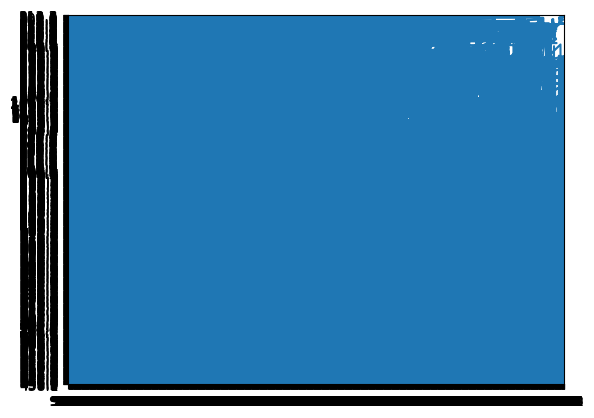

In [42]:
plt.plot(df_eye.X_R, df_eye.Y_R)
plt.xlim(0,1920)
plt.ylim(0,1080)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

In [250]:
xedges

array([-711.        , -640.66200195, -570.32400391, -499.98600586,
       -429.64800781, -359.31000977, -288.97201172, -218.63401367,
       -148.29601562,  -77.95801758,   -7.62001953,   62.71797852,
        133.05597656,  203.39397461,  273.73197266,  344.0699707 ,
        414.40796875,  484.7459668 ,  555.08396484,  625.42196289,
        695.75996094,  766.09795898,  836.43595703,  906.77395508,
        977.11195313, 1047.44995117, 1117.78794922, 1188.12594727,
       1258.46394531, 1328.80194336, 1399.13994141, 1469.47793945,
       1539.8159375 , 1610.15393555, 1680.49193359, 1750.82993164,
       1821.16792969, 1891.50592773, 1961.84392578, 2032.18192383,
       2102.51992187, 2172.85791992, 2243.19591797, 2313.53391602,
       2383.87191406, 2454.20991211, 2524.54791016, 2594.8859082 ,
       2665.22390625, 2735.5619043 , 2805.89990234])

In [260]:
df_eye = df_eye[(df_eye.X >= 0) &(df_eye.X <= 1920)]
df_eye = df_eye[(df_eye.Y >= 0) &(df_eye.Y <= 1080)]

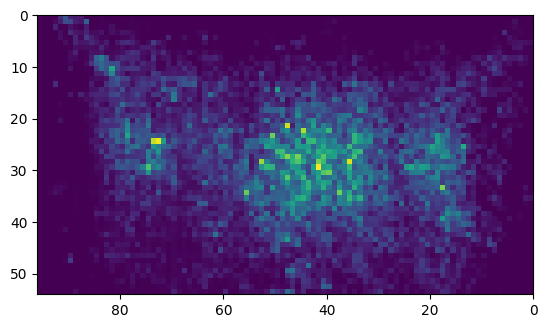

In [264]:
heatmap, xedges, yedges = np.histogram2d(df_eye.X, df_eye.Y, bins=(192//2, 108//2))
extent = [0, 192//2, 0, 108//2]
# extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
# plt.xlim(0,1920)
# plt.ylim(0,1080)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.show()

In [203]:
df_click_filtered.head()

,CurrentTimstamp,CurrentEvent,CurrentTarget,CurrentClickX,CurrentClickY,CurrentURL,outerWidth,outerHeight,innerWidth,innerHeight,created,CurrentHtml,Timestampdiff,SameURL,SameTarget
9,1684764738317,click,7dac1227-4da1-4a08-b81d-9c198305cbef,1067.0,881.0,https://www.amazon.com/s?k=dumbbell+weights&sp...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:19,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",NaN,False,False
21,1684764752618,click,0fa153b7-1ab8-4bdc-8cfa-23a2c6c5acdc,1114.0,435.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:33,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",14301.0,False,False
30,1684764765141,click,806a2f83-a598-407e-abdf-01db0e526f4f,1133.0,812.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:45,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",12523.0,False,False
39,1684764778222,click,a0ba9819-2822-4f2a-b48d-5cc277b512f3,972.0,947.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:12:59,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",13081.0,False,False
43,1684764784849,click,18628d22-5fca-42d2-b8d3-0fa545d56b33,968.0,962.0,https://www.amazon.com/s?k=dumbbell+weights&pa...,1920.0,1040.0,1920.0,969.0,2023-05-22 14:13:05,"<body class=""a-m-us a-aui_72554-c a-aui_accord...",6627.0,True,False


# Create Training Data

In [46]:
df_eye.head()

,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr,Timestamp
0,384009,1022.6,278.9,1929.0,987.0,312.5,1600.0,32768.0,0
1,384011,1023.1,280.0,1927.0,988.2,313.2,1593.0,32768.0,2
2,384013,1023.5,281.1,1928.0,987.8,311.6,1602.0,32768.0,4
3,384015,1024.1,282.1,1935.0,987.1,310.0,1612.0,32768.0,6
4,384017,1024.6,282.2,1938.0,988.7,310.6,1611.0,32768.0,8


In [59]:
df_eye.iloc[1:1+10000]

,Time,X_L,Y_L,PupilSize_L,X_R,Y_R,PupilSize_R,ParticipantNr,Timestamp
1,384011,1023.1,280.0,1927.0,988.2,313.2,1593.0,32768.0,2
2,384013,1023.5,281.1,1928.0,987.8,311.6,1602.0,32768.0,4
3,384015,1024.1,282.1,1935.0,987.1,310.0,1612.0,32768.0,6
4,384017,1024.6,282.2,1938.0,988.7,310.6,1611.0,32768.0,8
5,384019,1025.5,281.8,1934.0,987.4,309.6,1607.0,32768.0,10
...,...,...,...,...,...,...,...,...,...
9996,432119,579.5,405.7,689.0,426.4,393.8,586.0,32768.0,48110
9997,432121,579.5,404.7,688.0,427.7,393.0,585.0,32768.0,48112
9998,432123,578.9,402.8,687.0,427.4,392.0,583.0,32768.0,48114
9999,432125,578.3,402.5,688.0,426.0,392.1,584.0,32768.0,48116


In [71]:
df_eye['X_R'].replace('.', np.nan, inplace=True)
df_eye['Y_R'].replace('.', np.nan, inplace=True)

C:\Users\Lights\AppData\Local\Temp\ipykernel_2320\3878334895.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eye['X_R'].replace('.', np.nan, inplace=True)
C:\Users\Lights\AppData\Local\Temp\ipykernel_2320\3878334895.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [72]:
df_eye['X_R'] = df_eye['X_R'].astype(float).values
df_eye['Y_R'] = df_eye['Y_R'].astype(float).values

In [73]:
def clickOccuredinWindow(WindowMin, WindowMax):
    df_labels_tmp = df[(df.CurrentTimstamp > WindowMin) & (df.CurrentTimstamp < WindowMax)]
    # If atleast one click occured in that time the resulting df has more than 0 entries. the label is then 1
    if len(df_labels_tmp) > 0:
        return 1
    return 0

In [74]:
window_size = 1000
stride = window_size
x_train = []
y_train = []
# for i in range(0,len(df_eye), stride):
for i in range(0,10000, stride):
    df_window = df_eye.iloc[i:i+window_size]
    
    x_train.append(df_window[["X_R","Y_R"]].values)
    y_train.append(clickOccuredinWindow(df_window.Timestamp.min(), df_window.Timestamp.max()))
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape)
# Reshape Dense to (SampleAmount, Data) as Dense layers only take 1D input
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
print(x_train.shape)
y_train.shape

(10, 1000, 2)
(10, 2000)


(10,)

# TODO:
- extract x,y coords and width, heigth, and customuuid of all elements in the CurrentHTML
- create trainings data and labels with windows. Use a stride = window_size to reduce dataamount
- extract the clickable HTML elements -> these are the potential clicks 
- extract the actually clicked HTML elements (with the UUID in "CurrentTarget")
- filter data (maybe there are 3 clicks very close to each other because of the slow internet) 
- HTML Y coordinates have to be moved down by 71px, so 0,0 of eye and mouse matches (So the current (0,0) is (71,0))
- Timestamps between eye and mouse data have to be synced.
- One hot encoding, either a click or no click

# Goal: Train a first basic fully connected neural network which detects if did a click happen during the time window based on eye tracking data

In [75]:
print(x_train)

[[ 987.   312.5  988.2 ...  463.6  877.8  462.7]
 [ 875.6  462.2  876.5 ...  547.5  889.9  558.4]
 [ 856.3  568.6  822.8 ...  342.3 1059.4  343.3]
 ...
 [ 314.9  570.4  315.4 ...  569.4  970.6  568.9]
 [ 971.3  570.7  973.7 ...  189.5 1589.5  190.5]
 [1590.2  191.7 1590.4 ...  392.   426.   392.1]]


In [76]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create a sequential model
model = Sequential()


model.add(Dense(units=64, activation='relu', input_shape=(window_size*2,)))  # Replace input_dim with the appropriate input shape
model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.summary()

C:\Users\Lights\PycharmProjects\practical-machine-learning\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │       128,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,177 (508.50 KB)

 Trainable params: 130,177 (508.50 KB)

 Non-trainable params: 0 (0.00 B)

If you want to train LSTMs you probably need to use a datagenerator to generate the windows you use for training before each batch. 

In [83]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=10
          , batch_size=32, validation_split=0.2)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8750 - loss: 0.6868 - val_accuracy: 1.0000 - val_loss: 0.6842
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8750 - loss: 0.6864 - val_accuracy: 1.0000 - val_loss: 0.6837
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8750 - loss: 0.6861 - val_accuracy: 1.0000 - val_loss: 0.6832
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8750 - loss: 0.6857 - val_accuracy: 1.0000 - val_loss: 0.6827
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8750 - loss: 0.6853 - val_accuracy: 1.0000 - val_loss: 0.6822
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.8750 - loss: 0.6850 - val_accuracy: 1.0000 - val_loss: 0.6817
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.8750 - loss: 0.6846 - val_accuracy: 1.0000 - val_loss: 0.6812
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8750 - loss: 0.6842 - val_accuracy: 1.0000 - val_loss: 0.6807
Ep

In [84]:
print(history.history['loss'])

[0.6868168115615845, 0.6864461898803711, 0.6860759258270264, 0.6857057809829712, 0.6853358745574951, 0.6849663257598877, 0.6845970749855042, 0.6842280626296997, 0.6838592290878296, 0.6834907531738281]
